# LSTM 

## Outline
1. [Imports](#imports)
2. [Data](#data)
3. [Model](#model)
5. [Train](#train)
6. [Predict](#predict)

<a name=imports></a>
## Imports

In [358]:
%load_ext autoreload
%autoreload 2
import os
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

import preprocessing

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<a name=data></a>
## Data

### Ingestion 

In [359]:
# Check preprocessing.py for implementation
(india_cases_df, india_vacc_df, usa_cases_df, usa_vacc_df) = preprocessing.ingestion()

Parent Directory /covid19-prediction/models
Path: /covid19-prediction/models/../cleaned_datasets/india/daily_cases_india.csv
Exists: True
India Cases:
          Date  Confirmed  Deaths  Recovered
0  2020-01-30        NaN     NaN        NaN
1  2020-01-31        0.0     0.0        0.0
2  2020-02-01        0.0     0.0        0.0
3  2020-02-02        1.0     0.0        0.0
4  2020-02-03        1.0     0.0        0.0 

India Vacc:
          Date  Total_Doses
0  2021-01-15          NaN
1  2021-01-16          NaN
2  2021-01-17      33120.0
3  2021-01-18     229748.0
4  2021-01-19     220786.0 

USA Cases:
          Date  Confirmed  Deaths  Recovered
0  2020-04-12        NaN     NaN        NaN
1  2020-04-13    25255.0  1542.0    11785.0
2  2020-04-14    26694.0  2327.0     6484.0
3  2020-04-15    29318.0  2474.0     6093.0
4  2020-04-16    31235.0  4607.0     5234.0 

USA Vacc:
          Date  Total_Doses
0  2020-12-20     556208.0
1  2020-12-21     614117.0
2  2020-12-22     811071.0
3  2020-

### Pre-Processing

### Multivariate

In [360]:
# Check preprocessing.py for implementation
# Number of Null in India - 563
# Number of Null in USA - 261
(india_multi, usa_multi) = preprocessing.multivariate(india_cases_df, india_vacc_df, usa_cases_df, usa_vacc_df)

India:
          Date  Confirmed  Total_Doses
0  2020-01-30        NaN          NaN
1  2020-01-31        0.0          NaN
2  2020-02-01        0.0          NaN
3  2020-02-02        1.0          NaN
4  2020-02-03        1.0          NaN
USA:
          Date  Confirmed  Total_Doses
0  2020-04-12        NaN          NaN
1  2020-04-13    25255.0          NaN
2  2020-04-14    26694.0          NaN
3  2020-04-15    29318.0          NaN
4  2020-04-16    31235.0          NaN


### Univariate 

In [361]:
# Check preprocessing.py for implementation
# Number of Null in India - 0
# Number of Null in USA - 0
(india_cases_uni, usa_cases_uni) = preprocessing.univariate(india_cases_df, usa_cases_df)

India Cases:
    Confirmed
1        0.0
2        0.0
3        1.0
4        1.0
5        0.0 

USA Cases:
    Confirmed
1    25255.0
2    26694.0
3    29318.0
4    31235.0
5    32175.0 



### Drop Null

In [362]:
(india_multi, usa_multi) = preprocessing.dropNull(india_multi, usa_multi)

India:
            Date  Confirmed  Total_Doses
353  2021-01-17    13788.0      33120.0
354  2021-01-18    10050.0     229748.0
355  2021-01-19    13816.0     220786.0
356  2021-01-20    15244.0     131649.0
357  2021-01-21    14545.0     237050.0
USA:
            Date  Confirmed  Total_Doses
252  2020-12-20   185355.0     556208.0
253  2020-12-21   189716.0     614117.0
254  2020-12-22   201947.0     811071.0
255  2020-12-23   225777.0    1008025.0
256  2020-12-24   204900.0    1476305.0


### Normalize

In [363]:
# Check preprocessing.py for implementation
(india_uni_norm, usa_uni_norm, india_multi_norm, usa_multi_norm,india_cases_mean,india_cases_std,usa_cases_mean,usa_cases_std,india_multi_mean,india_multi_std,
usa_multi_std) = preprocessing.normalize(india_cases_uni, 
                                                                                           usa_cases_uni, 
                                                                                           india_multi, 
                                                                                           usa_multi)

India Cases univariate:
    Confirmed
1  -0.661747
2  -0.661747
3  -0.661734
4  -0.661734
5  -0.661747 

USA Cases univariate:
    Confirmed
1  -0.596456
2  -0.584433
3  -0.562508
4  -0.546491
5  -0.538637 

India Cases multivariate:
      Confirmed  Total_Doses
353  -0.562592    -1.302360
354  -0.601182    -1.243797
355  -0.562303    -1.246466
356  -0.547561    -1.273014
357  -0.554777    -1.241622 

USA Cases multivariate:
      Confirmed  Total_Doses
252   0.492914    -1.809935
253   0.523316    -1.809749
254   0.608584    -1.809118
255   0.774713    -1.808487
256   0.629171    -1.806987 



### Create Splits

In [364]:
# Create train test splits
(india_uni_train, india_uni_test, usa_uni_train, usa_uni_test) = preprocessing.split(india_uni_norm, usa_uni_norm, 0.2)
(india_multi_train, india_multi_test, 
 usa_multi_train, usa_multi_test) = preprocessing.split(india_multi_norm, usa_multi_norm, 0.2)

India:
      Confirmed
1    -0.661747
2    -0.661747
3    -0.661734
4    -0.661734
5    -0.661747
..         ...
565  -0.199747
566  -0.183686
567  -0.181453
568  -0.209217
569  -0.255301

[569 rows x 1 columns] 

USA:
      Confirmed
1    -0.596456
2    -0.584433
3    -0.562508
4    -0.546491
5    -0.538637
..         ...
507   0.882933
508   0.655423
509   1.161010
510  -0.188293
511  -0.412010

[511 rows x 1 columns] 

India:
      Confirmed  Total_Doses
353  -0.562592    -1.302360
354  -0.601182    -1.243797
355  -0.562303    -1.246466
356  -0.547561    -1.273014
357  -0.554777    -1.241622
..         ...          ...
638  -0.557172     1.442780
639  -0.572482     0.707335
640  -0.575745    -0.078616
641  -0.597332     0.183795
642  -0.582053    -0.697398

[279 rows x 2 columns] 

USA:
      Confirmed  Total_Doses
252   0.492914    -1.809935
253   0.523316    -1.809749
254   0.608584    -1.809118
255   0.774713    -1.808487
256   0.629171    -1.806987
..         ...          ...
55

### Data Transformation
Simple conversion from pandas dataframe to numpy array by extracting the values

In [365]:
# Univariate
india_uni_train_np, india_uni_test_np = india_uni_train.values,  india_uni_test.values
usa_uni_train_np, usa_uni_test_np = usa_uni_train.values, usa_uni_test.values
# Multivariate
india_multi_train_np, india_multi_test_np = india_multi_train.values,  india_multi_test.values
usa_multi_train_np, usa_multi_test_np = usa_multi_train.values, usa_multi_test.values

In [366]:
print(india_uni_train_np.shape, india_uni_test_np.shape)
print(india_multi_train_np.shape, india_multi_test_np.shape)

(569, 1) (143, 1)
(279, 2) (70, 2)


### Reshape
Converts the exiting train data set to match the input parameters of an LSTM (Samples, Time Steps, Features). The `lstm_data_transform()` method takes in 3 arguments: X data, y data and number of features.

We will be performing autoregression on the univariate data, therefore the X and y values are the same. As for the multivariate data, we will be using the confirmed column (index 0) as the y value.

In [367]:
india_uni_train_np

array([[-6.61747475e-01],
       [-6.61747475e-01],
       [-6.61734342e-01],
       [-6.61734342e-01],
       [-6.61747475e-01],
       [-6.61747475e-01],
       [-6.61747475e-01],
       [-6.61747475e-01],
       [-6.61747475e-01],
       [-6.61747475e-01],
       [-6.61747475e-01],
       [-6.61747475e-01],
       [-6.61747475e-01],
       [-6.61747475e-01],
       [-6.61747475e-01],
       [-6.61747475e-01],
       [-6.61747475e-01],
       [-6.61747475e-01],
       [-6.61747475e-01],
       [-6.61747475e-01],
       [-6.61747475e-01],
       [-6.61747475e-01],
       [-6.61747475e-01],
       [-6.61747475e-01],
       [-6.61747475e-01],
       [-6.61747475e-01],
       [-6.61747475e-01],
       [-6.61747475e-01],
       [-6.61747475e-01],
       [-6.61747475e-01],
       [-6.61747475e-01],
       [-6.61721209e-01],
       [-6.61747475e-01],
       [-6.61445411e-01],
       [-6.61721209e-01],
       [-6.61734342e-01],
       [-6.61708076e-01],
       [-6.61681809e-01],
       [-6.6

In [368]:
timesteps = 14

In [369]:
# Univariate
india_uni_train_X, india_uni_train_y = preprocessing.lstm_data_transform(india_uni_train_np, india_uni_train_np, timesteps)
usa_uni_train_X, usa_uni_train_y = preprocessing.lstm_data_transform(usa_uni_train_np, usa_uni_train_np, timesteps)
# Multivariate
india_multi_train_X, india_multi_train_y = preprocessing.lstm_data_transform(india_multi_train_np, india_multi_train_np[:,0], timesteps)
usa_multi_train_X, usa_multi_train_y = preprocessing.lstm_data_transform(usa_multi_train_np, usa_multi_train_np[:,0], timesteps)

In [370]:
print("Univariate India shape:",india_uni_train_X.shape, india_uni_train_y.shape)
print("Multivariate India shape:",india_multi_train_X.shape, india_multi_train_y.shape)

Univariate India shape: (555, 14, 1) (555, 1)
Multivariate India shape: (265, 14, 2) (265,)


The univariate array shape for the India dataset has 566 samples, 3 as the time step, and 1 feature for the X values. The y values is just the 566 samples.

Similarly, the multivariate array shape for the India dataset has 276 samples, 3 as the time step, and 2 features for the X values. The y values is just the 276 samples of the 0th column (Confirmed cases).

<a name=model></a>
## Model
We will define 4 models in total. One for the univariate data and another for the multivariate for each country.

In [371]:
import LSTMmodels
from keras.wrappers.scikit_learn import KerasRegressor
import tensorflow as tf

In [372]:
univariate_model_ind = LSTMmodels.build_lstm(time_steps=india_uni_train_X.shape[1], features=india_uni_train_X.shape[2])
univariate_model_usa = LSTMmodels.build_lstm(time_steps=usa_uni_train_X.shape[1], features=usa_uni_train_X.shape[2])

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_21 (LSTM)               (None, 100)               40800     
_________________________________________________________________
dense_21 (Dense)             (None, 20)                2020      
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 21        
Total params: 42,841
Trainable params: 42,841
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_22 (LSTM)               (None, 100)               40800     
_________________________________________________________________
dense_23 (Dense)             (None, 20)                2020      
__________________________

In [373]:
multivariate_model_ind = LSTMmodels.build_lstm(time_steps=india_multi_train_X.shape[1], features=india_multi_train_X.shape[2], outputs=2)
multivariate_model_usa = LSTMmodels.build_lstm(time_steps=usa_multi_train_X.shape[1], features=usa_multi_train_X.shape[2], outputs=2)

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_23 (LSTM)               (None, 100)               41200     
_________________________________________________________________
dense_25 (Dense)             (None, 20)                2020      
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 21        
Total params: 43,241
Trainable params: 43,241
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 100)               41200     
_________________________________________________________________
dense_27 (Dense)             (None, 20)                2020      
__________________________

<a name=train></a>
## Train 

In [374]:
# Get the path of the current working directory
curPath = os.getcwd()
# Appened the parent directory to the current path to step out of the current folder
parentDir = os.path.abspath(os.path.join(curPath, os.pardir))
# Tensorboard callback
logdir = os.path.join(parentDir+"/logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [375]:
def train_models(model,train_X,train_y,test_X,test_y):
    model.fit(train_X,train_y,
              validation_data=(test_X,test_y),
              epochs=300,
              callbacks=[tensorboard_callback])
    return model
#     model.save(save_name)

In [376]:
# Train the model on univariate India dataset 
univariate_model_ind = LSTMmodels.train_model(univariate_model_ind,india_uni_train_X,india_uni_train_y,tensorboard_callback)

Epoch 1/300
18/18 [==============================] - 1s 31ms/step - loss: 0.5714 - mae: 0.5714
Epoch 2/300
18/18 [==============================] - 0s 13ms/step - loss: 0.2836 - mae: 0.2836
Epoch 3/300
18/18 [==============================] - 0s 12ms/step - loss: 0.1773 - mae: 0.1773
Epoch 4/300
18/18 [==============================] - 0s 13ms/step - loss: 0.1459 - mae: 0.1459
Epoch 5/300
18/18 [==============================] - 0s 12ms/step - loss: 0.1348 - mae: 0.1348
Epoch 6/300
18/18 [==============================] - 0s 12ms/step - loss: 0.1260 - mae: 0.1260
Epoch 7/300
18/18 [==============================] - 0s 13ms/step - loss: 0.1241 - mae: 0.1241
Epoch 8/300
18/18 [==============================] - 0s 13ms/step - loss: 0.1131 - mae: 0.1131
Epoch 9/300
18/18 [==============================] - 0s 12ms/step - loss: 0.1095 - mae: 0.1095
Epoch 10/300
18/18 [==============================] - 0s 13ms/step - loss: 0.0883 - mae: 0.0883
Epoch 11/300
18/18 [=============================

18/18 [==============================] - 0s 13ms/step - loss: 0.0553 - mae: 0.0553
Epoch 87/300
18/18 [==============================] - 0s 13ms/step - loss: 0.0511 - mae: 0.0511
Epoch 88/300
18/18 [==============================] - 0s 13ms/step - loss: 0.0487 - mae: 0.0487
Epoch 89/300
18/18 [==============================] - 0s 13ms/step - loss: 0.0511 - mae: 0.0511
Epoch 90/300
18/18 [==============================] - 0s 12ms/step - loss: 0.0504 - mae: 0.0504
Epoch 91/300
18/18 [==============================] - 0s 12ms/step - loss: 0.0524 - mae: 0.0524
Epoch 92/300
18/18 [==============================] - 0s 13ms/step - loss: 0.0474 - mae: 0.0474
Epoch 93/300
18/18 [==============================] - 0s 12ms/step - loss: 0.0505 - mae: 0.0505
Epoch 94/300
18/18 [==============================] - 0s 12ms/step - loss: 0.0554 - mae: 0.0554
Epoch 95/300
18/18 [==============================] - 0s 12ms/step - loss: 0.0498 - mae: 0.0498
Epoch 96/300
18/18 [==============================] -

18/18 [==============================] - 0s 13ms/step - loss: 0.0446 - mae: 0.0446
Epoch 171/300
18/18 [==============================] - 0s 13ms/step - loss: 0.0475 - mae: 0.0475
Epoch 172/300
18/18 [==============================] - 0s 12ms/step - loss: 0.0466 - mae: 0.0466
Epoch 173/300
18/18 [==============================] - 0s 13ms/step - loss: 0.0457 - mae: 0.0457
Epoch 174/300
18/18 [==============================] - 0s 13ms/step - loss: 0.0443 - mae: 0.0443
Epoch 175/300
18/18 [==============================] - 0s 13ms/step - loss: 0.0430 - mae: 0.0430
Epoch 176/300
18/18 [==============================] - 0s 13ms/step - loss: 0.0447 - mae: 0.0447
Epoch 177/300
18/18 [==============================] - 0s 13ms/step - loss: 0.0477 - mae: 0.0477
Epoch 178/300
18/18 [==============================] - 0s 13ms/step - loss: 0.0463 - mae: 0.0463
Epoch 179/300
18/18 [==============================] - 0s 12ms/step - loss: 0.0430 - mae: 0.0430
Epoch 180/300
18/18 [=======================

18/18 [==============================] - 0s 13ms/step - loss: 0.0445 - mae: 0.0445
Epoch 255/300
18/18 [==============================] - 0s 13ms/step - loss: 0.0410 - mae: 0.0410
Epoch 256/300
18/18 [==============================] - 0s 13ms/step - loss: 0.0404 - mae: 0.0404
Epoch 257/300
18/18 [==============================] - 0s 12ms/step - loss: 0.0401 - mae: 0.0401
Epoch 258/300
18/18 [==============================] - 0s 12ms/step - loss: 0.0439 - mae: 0.0439
Epoch 259/300
18/18 [==============================] - 0s 12ms/step - loss: 0.0431 - mae: 0.0431
Epoch 260/300
18/18 [==============================] - 0s 13ms/step - loss: 0.0399 - mae: 0.0399
Epoch 261/300
18/18 [==============================] - 0s 13ms/step - loss: 0.0384 - mae: 0.0384
Epoch 262/300
18/18 [==============================] - 0s 13ms/step - loss: 0.0393 - mae: 0.0393
Epoch 263/300
18/18 [==============================] - 0s 13ms/step - loss: 0.0384 - mae: 0.0384
Epoch 264/300
18/18 [=======================

In [377]:
# Train the model on univariate USA dataset 
univariate_model_usa = LSTMmodels.train_model(univariate_model_usa,usa_uni_train_X,usa_uni_train_y,tensorboard_callback)

Epoch 1/300
16/16 [==============================] - 1s 32ms/step - loss: 0.3740 - mae: 0.3740
Epoch 2/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1973 - mae: 0.1973
Epoch 3/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1544 - mae: 0.1544
Epoch 4/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1447 - mae: 0.1447
Epoch 5/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1404 - mae: 0.1404
Epoch 6/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1382 - mae: 0.1382
Epoch 7/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1375 - mae: 0.1375
Epoch 8/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1322 - mae: 0.1322
Epoch 9/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1296 - mae: 0.1296
Epoch 10/300
16/16 [==============================] - 0s 14ms/step - loss: 0.1295 - mae: 0.1295
Epoch 11/300
16/16 [=============================

16/16 [==============================] - 0s 13ms/step - loss: 0.0814 - mae: 0.0814
Epoch 87/300
16/16 [==============================] - 0s 14ms/step - loss: 0.0759 - mae: 0.0759
Epoch 88/300
16/16 [==============================] - 0s 13ms/step - loss: 0.0860 - mae: 0.0860
Epoch 89/300
16/16 [==============================] - 0s 12ms/step - loss: 0.0772 - mae: 0.0772
Epoch 90/300
16/16 [==============================] - 0s 13ms/step - loss: 0.0739 - mae: 0.0739
Epoch 91/300
16/16 [==============================] - 0s 12ms/step - loss: 0.0837 - mae: 0.0837
Epoch 92/300
16/16 [==============================] - 0s 12ms/step - loss: 0.0746 - mae: 0.0746
Epoch 93/300
16/16 [==============================] - 0s 13ms/step - loss: 0.0845 - mae: 0.0845
Epoch 94/300
16/16 [==============================] - 0s 13ms/step - loss: 0.0789 - mae: 0.0789
Epoch 95/300
16/16 [==============================] - 0s 12ms/step - loss: 0.0792 - mae: 0.0792
Epoch 96/300
16/16 [==============================] -

16/16 [==============================] - 0s 14ms/step - loss: 0.0565 - mae: 0.0565
Epoch 171/300
16/16 [==============================] - 0s 13ms/step - loss: 0.0626 - mae: 0.0626
Epoch 172/300
16/16 [==============================] - 0s 14ms/step - loss: 0.0604 - mae: 0.0604
Epoch 173/300
16/16 [==============================] - 0s 12ms/step - loss: 0.0541 - mae: 0.0541
Epoch 174/300
16/16 [==============================] - 0s 13ms/step - loss: 0.0548 - mae: 0.0548
Epoch 175/300
16/16 [==============================] - 0s 13ms/step - loss: 0.0523 - mae: 0.0523
Epoch 176/300
16/16 [==============================] - 0s 13ms/step - loss: 0.0591 - mae: 0.0591
Epoch 177/300
16/16 [==============================] - 0s 13ms/step - loss: 0.0565 - mae: 0.0565
Epoch 178/300
16/16 [==============================] - 0s 13ms/step - loss: 0.0554 - mae: 0.0554
Epoch 179/300
16/16 [==============================] - 0s 13ms/step - loss: 0.0533 - mae: 0.0533
Epoch 180/300
16/16 [=======================

16/16 [==============================] - 0s 13ms/step - loss: 0.0487 - mae: 0.0487
Epoch 255/300
16/16 [==============================] - 0s 13ms/step - loss: 0.0479 - mae: 0.0479
Epoch 256/300
16/16 [==============================] - 0s 13ms/step - loss: 0.0494 - mae: 0.0494
Epoch 257/300
16/16 [==============================] - 0s 12ms/step - loss: 0.0504 - mae: 0.0504
Epoch 258/300
16/16 [==============================] - 0s 13ms/step - loss: 0.0484 - mae: 0.0484
Epoch 259/300
16/16 [==============================] - 0s 12ms/step - loss: 0.0461 - mae: 0.0461
Epoch 260/300
16/16 [==============================] - 0s 13ms/step - loss: 0.0464 - mae: 0.0464
Epoch 261/300
16/16 [==============================] - 0s 13ms/step - loss: 0.0453 - mae: 0.0453
Epoch 262/300
16/16 [==============================] - 0s 12ms/step - loss: 0.0438 - mae: 0.0438
Epoch 263/300
16/16 [==============================] - 0s 13ms/step - loss: 0.0445 - mae: 0.0445
Epoch 264/300
16/16 [=======================

In [378]:
# Train the model on multivariate India dataset
multivariate_model_ind = LSTMmodels.train_model(multivariate_model_ind,india_multi_train_X,india_multi_train_y,tensorboard_callback)

Epoch 1/300
9/9 [==============================] - 1s 52ms/step - loss: 0.5448 - mae: 0.5448
Epoch 2/300
9/9 [==============================] - 0s 13ms/step - loss: 0.4102 - mae: 0.4102
Epoch 3/300
9/9 [==============================] - 0s 12ms/step - loss: 0.2344 - mae: 0.2344
Epoch 4/300
9/9 [==============================] - 0s 12ms/step - loss: 0.1992 - mae: 0.1992
Epoch 5/300
9/9 [==============================] - 0s 12ms/step - loss: 0.1778 - mae: 0.1778
Epoch 6/300
9/9 [==============================] - 0s 12ms/step - loss: 0.1690 - mae: 0.1690
Epoch 7/300
9/9 [==============================] - 0s 14ms/step - loss: 0.1943 - mae: 0.1943
Epoch 8/300
9/9 [==============================] - 0s 12ms/step - loss: 0.2050 - mae: 0.2050
Epoch 9/300
9/9 [==============================] - 0s 12ms/step - loss: 0.1679 - mae: 0.1679
Epoch 10/300
9/9 [==============================] - 0s 12ms/step - loss: 0.1628 - mae: 0.1628
Epoch 11/300
9/9 [==============================] - 0s 12ms/step - lo

9/9 [==============================] - 0s 13ms/step - loss: 0.0522 - mae: 0.0522
Epoch 89/300
9/9 [==============================] - 0s 13ms/step - loss: 0.0515 - mae: 0.0515
Epoch 90/300
9/9 [==============================] - 0s 13ms/step - loss: 0.0506 - mae: 0.0506
Epoch 91/300
9/9 [==============================] - 0s 12ms/step - loss: 0.0507 - mae: 0.0507
Epoch 92/300
9/9 [==============================] - 0s 13ms/step - loss: 0.0572 - mae: 0.0572
Epoch 93/300
9/9 [==============================] - 0s 12ms/step - loss: 0.0553 - mae: 0.0553
Epoch 94/300
9/9 [==============================] - 0s 12ms/step - loss: 0.0552 - mae: 0.0552
Epoch 95/300
9/9 [==============================] - 0s 13ms/step - loss: 0.0508 - mae: 0.0508
Epoch 96/300
9/9 [==============================] - 0s 12ms/step - loss: 0.0652 - mae: 0.0652
Epoch 97/300
9/9 [==============================] - 0s 12ms/step - loss: 0.0538 - mae: 0.0538
Epoch 98/300
9/9 [==============================] - 0s 12ms/step - loss: 

9/9 [==============================] - 0s 12ms/step - loss: 0.0427 - mae: 0.0427
Epoch 175/300
9/9 [==============================] - 0s 13ms/step - loss: 0.0436 - mae: 0.0436
Epoch 176/300
9/9 [==============================] - 0s 13ms/step - loss: 0.0457 - mae: 0.0457
Epoch 177/300
9/9 [==============================] - 0s 12ms/step - loss: 0.0444 - mae: 0.0444
Epoch 178/300
9/9 [==============================] - 0s 12ms/step - loss: 0.0401 - mae: 0.0401
Epoch 179/300
9/9 [==============================] - 0s 12ms/step - loss: 0.0403 - mae: 0.0403
Epoch 180/300
9/9 [==============================] - 0s 12ms/step - loss: 0.0400 - mae: 0.0400
Epoch 181/300
9/9 [==============================] - 0s 13ms/step - loss: 0.0402 - mae: 0.0402
Epoch 182/300
9/9 [==============================] - 0s 12ms/step - loss: 0.0407 - mae: 0.0407
Epoch 183/300
9/9 [==============================] - 0s 13ms/step - loss: 0.0376 - mae: 0.0376
Epoch 184/300
9/9 [==============================] - 0s 14ms/ste

9/9 [==============================] - 0s 13ms/step - loss: 0.0324 - mae: 0.0324
Epoch 261/300
9/9 [==============================] - 0s 13ms/step - loss: 0.0305 - mae: 0.0305
Epoch 262/300
9/9 [==============================] - 0s 11ms/step - loss: 0.0308 - mae: 0.0308
Epoch 263/300
9/9 [==============================] - 0s 13ms/step - loss: 0.0317 - mae: 0.0317
Epoch 264/300
9/9 [==============================] - 0s 12ms/step - loss: 0.0367 - mae: 0.0367
Epoch 265/300
9/9 [==============================] - 0s 12ms/step - loss: 0.0324 - mae: 0.0324
Epoch 266/300
9/9 [==============================] - 0s 13ms/step - loss: 0.0378 - mae: 0.0378
Epoch 267/300
9/9 [==============================] - 0s 13ms/step - loss: 0.0337 - mae: 0.0337
Epoch 268/300
9/9 [==============================] - 0s 13ms/step - loss: 0.0327 - mae: 0.0327
Epoch 269/300
9/9 [==============================] - 0s 12ms/step - loss: 0.0358 - mae: 0.0358
Epoch 270/300
9/9 [==============================] - 0s 12ms/ste

In [379]:
# Train the model on multivariate USA dataset
multivariate_model_usa = LSTMmodels.train_model(multivariate_model_usa,usa_multi_train_X,usa_multi_train_y,tensorboard_callback)

Epoch 1/300
10/10 [==============================] - 1s 46ms/step - loss: 0.3629 - mae: 0.3629
Epoch 2/300
10/10 [==============================] - 0s 12ms/step - loss: 0.2328 - mae: 0.2328
Epoch 3/300
10/10 [==============================] - 0s 13ms/step - loss: 0.1867 - mae: 0.1867
Epoch 4/300
10/10 [==============================] - 0s 12ms/step - loss: 0.1725 - mae: 0.1725
Epoch 5/300
10/10 [==============================] - 0s 14ms/step - loss: 0.1699 - mae: 0.1699
Epoch 6/300
10/10 [==============================] - 0s 11ms/step - loss: 0.1688 - mae: 0.1688
Epoch 7/300
10/10 [==============================] - 0s 12ms/step - loss: 0.1703 - mae: 0.1703
Epoch 8/300
10/10 [==============================] - 0s 12ms/step - loss: 0.1717 - mae: 0.1717
Epoch 9/300
10/10 [==============================] - 0s 12ms/step - loss: 0.1676 - mae: 0.1676
Epoch 10/300
10/10 [==============================] - 0s 12ms/step - loss: 0.1608 - mae: 0.1608
Epoch 11/300
10/10 [=============================

10/10 [==============================] - 0s 12ms/step - loss: 0.0800 - mae: 0.0800
Epoch 87/300
10/10 [==============================] - 0s 13ms/step - loss: 0.0827 - mae: 0.0827
Epoch 88/300
10/10 [==============================] - 0s 12ms/step - loss: 0.0837 - mae: 0.0837
Epoch 89/300
10/10 [==============================] - 0s 13ms/step - loss: 0.0970 - mae: 0.0970
Epoch 90/300
10/10 [==============================] - 0s 12ms/step - loss: 0.0862 - mae: 0.0862
Epoch 91/300
10/10 [==============================] - 0s 12ms/step - loss: 0.0922 - mae: 0.0922
Epoch 92/300
10/10 [==============================] - 0s 12ms/step - loss: 0.0843 - mae: 0.0843
Epoch 93/300
10/10 [==============================] - 0s 12ms/step - loss: 0.0794 - mae: 0.0794
Epoch 94/300
10/10 [==============================] - 0s 12ms/step - loss: 0.0794 - mae: 0.0794
Epoch 95/300
10/10 [==============================] - 0s 11ms/step - loss: 0.0800 - mae: 0.0800
Epoch 96/300
10/10 [==============================] -

10/10 [==============================] - 0s 11ms/step - loss: 0.0654 - mae: 0.0654
Epoch 171/300
10/10 [==============================] - 0s 12ms/step - loss: 0.0593 - mae: 0.0593
Epoch 172/300
10/10 [==============================] - 0s 13ms/step - loss: 0.0578 - mae: 0.0578
Epoch 173/300
10/10 [==============================] - 0s 11ms/step - loss: 0.0648 - mae: 0.0648
Epoch 174/300
10/10 [==============================] - 0s 12ms/step - loss: 0.0578 - mae: 0.0578
Epoch 175/300
10/10 [==============================] - 0s 12ms/step - loss: 0.0553 - mae: 0.0553
Epoch 176/300
10/10 [==============================] - 0s 12ms/step - loss: 0.0534 - mae: 0.0534
Epoch 177/300
10/10 [==============================] - 0s 12ms/step - loss: 0.0545 - mae: 0.0545
Epoch 178/300
10/10 [==============================] - 0s 12ms/step - loss: 0.0535 - mae: 0.0535
Epoch 179/300
10/10 [==============================] - 0s 13ms/step - loss: 0.0548 - mae: 0.0548
Epoch 180/300
10/10 [=======================

10/10 [==============================] - 0s 12ms/step - loss: 0.0487 - mae: 0.0487
Epoch 255/300
10/10 [==============================] - 0s 13ms/step - loss: 0.0500 - mae: 0.0500
Epoch 256/300
10/10 [==============================] - 0s 12ms/step - loss: 0.0554 - mae: 0.0554
Epoch 257/300
10/10 [==============================] - 0s 13ms/step - loss: 0.0568 - mae: 0.0568
Epoch 258/300
10/10 [==============================] - 0s 13ms/step - loss: 0.0570 - mae: 0.0570
Epoch 259/300
10/10 [==============================] - 0s 13ms/step - loss: 0.0463 - mae: 0.0463
Epoch 260/300
10/10 [==============================] - 0s 12ms/step - loss: 0.0434 - mae: 0.0434
Epoch 261/300
10/10 [==============================] - 0s 11ms/step - loss: 0.0486 - mae: 0.0486
Epoch 262/300
10/10 [==============================] - 0s 12ms/step - loss: 0.0502 - mae: 0.0502
Epoch 263/300
10/10 [==============================] - 0s 12ms/step - loss: 0.0503 - mae: 0.0503
Epoch 264/300
10/10 [=======================

<a name=predict></a>
## Predict

In [380]:
import evaluate

In [381]:
india_uni_test_np.shape

(143, 1)

In [382]:
india_multi_test_np.shape

(70, 2)

In [383]:
# Univariate Rolling Long-Term
yhat_uni_india = evaluate.make_predictions(univariate_model_ind,india_uni_test_np,timesteps,india_uni_test_np.shape[1])
yhat_uni_usa = evaluate.make_predictions(univariate_model_usa,usa_uni_test_np,timesteps,usa_uni_test_np.shape[1])

In [384]:
# Univariate Rolling Short-Term
yhat_uni_india_short, y_uni_india_short = evaluate.make_predictions_short(univariate_model_ind,india_uni_test_np,timesteps,india_uni_test_np.shape[1])
yhat_uni_usa_short, y_uni_usa_short = evaluate.make_predictions_short(univariate_model_usa,usa_uni_test_np,timesteps,usa_uni_test_np.shape[1])

In [386]:
# Multivariate Rolling Short-Term
yhat_multi_india = evaluate.make_predictions_short(multivariate_model_ind,india_multi_test_np,timesteps,india_multi_test_np.shape[1])
yhat_multi_usa = evaluate.make_predictions_short(multivariate_model_usa,usa_multi_test_np,timesteps,usa_multi_test_np.shape[1])

In [405]:
yhat_multi_india = yhat_multi_india[0]

In [387]:
yhat_multi_india

(array([[-0.5837825 ],
        [-0.58377343],
        [-0.6021578 ],
        [-0.59654456],
        [-0.5988839 ],
        [-0.5806191 ],
        [-0.61077374],
        [-0.60584015],
        [-0.61049837],
        [-0.5813472 ],
        [-0.58500737],
        [-0.555353  ],
        [-0.5830115 ],
        [-0.57595575],
        [-0.59269625],
        [-0.61460227],
        [-0.6416369 ],
        [-0.6230503 ],
        [-0.6618994 ],
        [-0.60014206],
        [-0.5934396 ],
        [-0.59511054],
        [-0.6262927 ],
        [-0.67044395],
        [-0.6924717 ],
        [-0.5901984 ],
        [-0.5984715 ],
        [-0.58875173],
        [-0.59849644],
        [-0.6060332 ],
        [-0.6060953 ],
        [-0.6267145 ],
        [-0.6305056 ],
        [-0.62725496],
        [-0.6203504 ],
        [-0.60378045],
        [-0.62940985],
        [-0.626388  ],
        [-0.60352916],
        [-0.6441512 ],
        [-0.64582455],
        [-0.6041034 ],
        [-0.5764895 ],
        [-0

In [388]:
yhat_uni_india.shape

(1, 143, 1)

## Evaluate

In [389]:
from tensorflow.keras.losses import MeanAbsolutePercentageError, MeanAbsoluteError

### Denormalize Data 

In [390]:
type(np.array(india_cases_mean))
np.array(india_cases_mean)

array([50387.34410112])

In [391]:
# Denormalize univariate India data
india_uni_test_np_denorm = preprocessing.de_normalize(india_uni_test_np.flatten()[timesteps:],np.array(india_cases_mean),np.array(india_cases_std))
yhat_uni_india_denorm = preprocessing.de_normalize(yhat_uni_india.flatten()[timesteps:],np.array(india_cases_mean),np.array(india_cases_std))

In [392]:
india_uni_test_np_denorm = np.round(india_uni_test_np_denorm)
yhat_uni_india_denorm = np.round(yhat_uni_india_denorm)

In [393]:
# Denormalize univariate short India data
india_uni_test_short_denorm = preprocessing.de_normalize(y_uni_india_short.flatten()[timesteps:],np.array(india_cases_mean),np.array(india_cases_std))
yhat_uni_india_short_denorm = preprocessing.de_normalize(yhat_uni_india_short.flatten()[timesteps:],np.array(india_cases_mean),np.array(india_cases_std))

In [394]:
india_uni_test_short_denorm = np.round(india_uni_test_short_denorm)
yhat_uni_india_short_denorm = np.round(yhat_uni_india_short_denorm)

In [395]:
# Denormalize univariate USA data
usa_uni_test_np_denorm = preprocessing.de_normalize(usa_uni_test_np.flatten()[timesteps:],np.array(usa_cases_mean),np.array(usa_cases_std))
yhat_uni_usa_denorm = preprocessing.de_normalize(yhat_uni_usa.flatten()[timesteps:],np.array(usa_cases_mean),np.array(usa_cases_std))

In [396]:
usa_uni_test_np_denorm = np.round(usa_uni_test_np_denorm)
yhat_uni_usa_denorm = np.round(yhat_uni_usa_denorm)

In [397]:
# Denormalize univariate short USA data
usa_uni_test_short_denorm = preprocessing.de_normalize(y_uni_usa_short.flatten()[timesteps:],np.array(usa_cases_mean),np.array(usa_cases_std))
yhat_uni_usa_short_denorm = preprocessing.de_normalize(yhat_uni_usa_short.flatten()[timesteps:],np.array(usa_cases_mean),np.array(usa_cases_std))

In [398]:
usa_uni_test_short_denorm = np.round(usa_uni_test_short_denorm)
yhat_uni_usa_short_denorm = np.round(yhat_uni_usa_short_denorm)

In [407]:
yhat_multi_india.shape

(56, 1)

In [408]:
# Denormalize multivariate India data
india_multi_test_np_denorm = preprocessing.de_normalize(india_multi_test_np[:,0].flatten()[timesteps:],np.array(india_multi_mean[0]),np.array(india_multi_std[0]))
yhat_multi_india_denorm = preprocessing.de_normalize(yhat_multi_india.flatten()[timesteps:],np.array(india_multi_mean[0]),np.array(india_multi_std[0]))

In [409]:
india_multi_test_np_denorm = np.round(india_multi_test_np_denorm)
yhat_multi_india_denorm = np.round(yhat_multi_india_denorm)

### Get Metrics 
Return format: (mape, mae, rmse)

In [410]:
denorm_test = evaluate.evaluate((india_cases_uni.values)[uni_india_size:].flatten(),india_uni_test_np_denorm)
denorm_test

[0.0, 0.0, 0.0]

In [411]:
uni_india_eval = evaluate.evaluate(india_uni_test_np_denorm[:-1], yhat_uni_india_denorm[:-1])
uni_india_eval.insert(0,'Univariate India')
uni_india_eval

['Univariate India', 199164067840.0, 11002.21875, 29721.707]

In [412]:
uni_usa_eval = evaluate.evaluate(usa_uni_test_np_denorm, yhat_uni_usa_denorm)
uni_usa_eval.insert(0,'Univariate USA')
uni_usa_eval

['Univariate USA', 135.93186950683594, 153248.15625, 252925.78]

In [416]:
# Short term
uni_india_short_eval = evaluate.evaluate(india_uni_test_short_denorm[:-1], yhat_uni_india_short_denorm[:-1])
uni_india_short_eval.insert(0,'Univariate Short-Term India')
uni_india_short_eval

['Univariate Short-Term India', 140991234048.0, 3389.184326171875, 8270.6455]

In [417]:
uni_usa_short_eval = evaluate.evaluate(usa_uni_test_short_denorm, yhat_uni_usa_short_denorm)
uni_usa_short_eval.insert(0,'Univariate Short-Term USA')
uni_usa_short_eval

['Univariate Short-Term USA', 57.120418548583984, 115131.671875, 243660.64]

In [429]:
india_multi_test_np_denorm[14:-1]

array([  9765.,   9216.,   8603.,      0.,  17201.,   6822.,   8439.,
         9419.,   8402.,   7990.,   7877.,   7350.,   5784.,   6984.,
         7974.,   7447.,      0.,   7145.,  13644.,   5326.,   6317.,
         7495.,   6650.,   7189.,   6987.,   6531.,   6358.,   9195.,
        13154.,  16764.,  22775.,  27553.,  33750.,  37379.,  58097.,
        90928., 117100., 141986., 159632., 179723., 168063.,      0.])

In [428]:
yhat_multi_india_denorm.size

42

In [430]:
# Multivariate India
multi_india_eval = evaluate.evaluate(india_multi_test_np_denorm[14:-1], yhat_multi_india_denorm)
multi_india_eval.insert(0,'Univariate India')
multi_india_eval

['Univariate India', 2764166700000.0, 18918.453, 36486.957]

### Visualize performance

In [341]:
d = [uni_india_eval,uni_usa_eval,uni_india_short_eval,uni_usa_short_eval]
pd.DataFrame(data=d, columns=['Models','MAPE','MAE','RMSE'])

,Models,MAPE,MAE,RMSE
0,Univariate India,6.102891e+11,26426.945312,33081.464844
1,Univariate USA,1.274454e+02,146916.781250,239731.671875
2,Univariate Short-Term India,1.502193e+11,3687.807129,9026.706055
3,Univariate Short-Term USA,4.161174e+01,86997.960938,189935.859375


## Plots

#### Long-Term Rolling forecasts

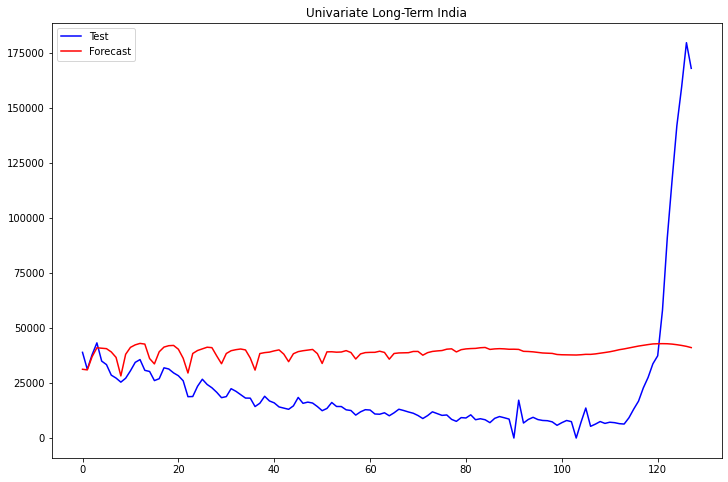

In [342]:
evaluate.plot_fore_test(india_uni_test_np_denorm[:-1], yhat_uni_india_denorm[:-1], 'Univariate Long-Term India')

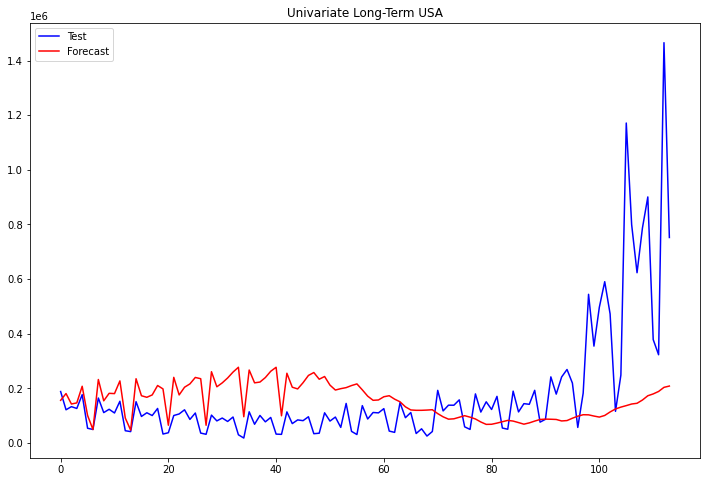

In [343]:
evaluate.plot_fore_test(usa_uni_test_np_denorm, yhat_uni_usa_denorm, 'Univariate Long-Term USA')

#### Short-Term Rolling Forecast

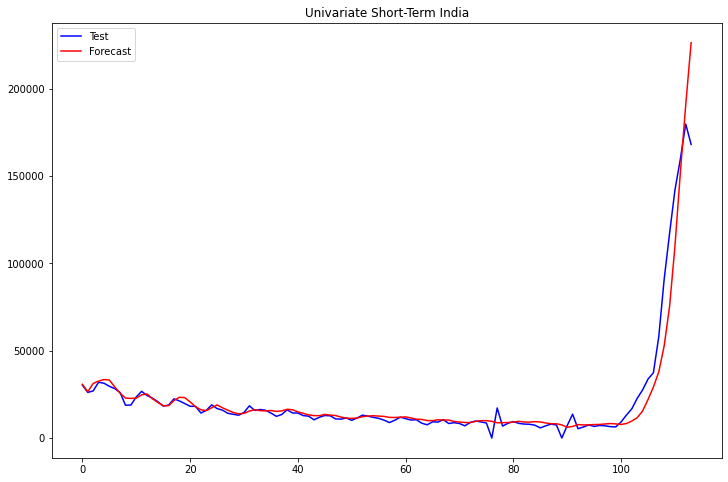

In [344]:
evaluate.plot_fore_test(india_uni_test_short_denorm[:-1], yhat_uni_india_short_denorm[:-1], "Univariate Short-Term India")

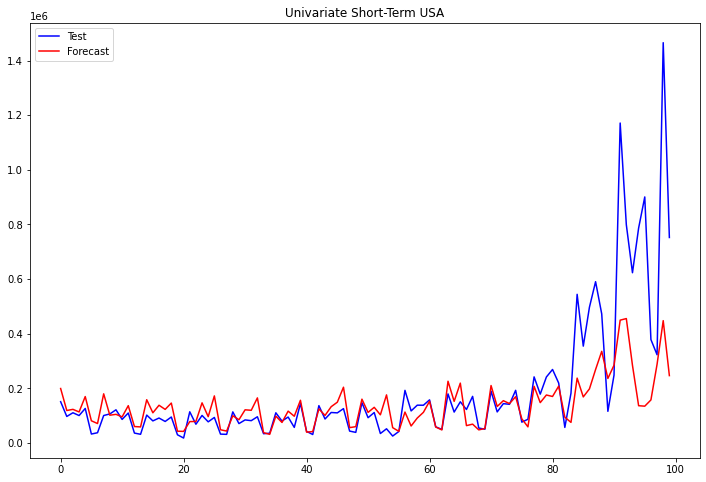

In [345]:
evaluate.plot_fore_test(usa_uni_test_short_denorm, yhat_uni_usa_short_denorm, "Univariate Short-Term USA")

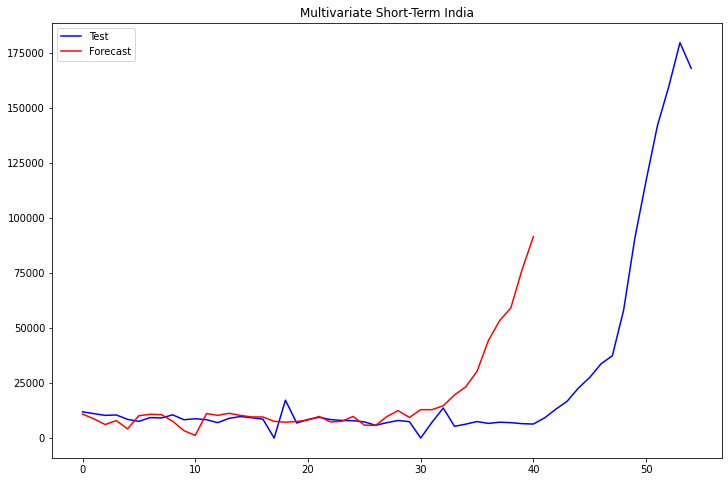

In [424]:
evaluate.plot_fore_test(india_multi_test_np_denorm[:-1], yhat_multi_india_denorm[:-1], "Multivariate Short-Term India")

In [ ]:
# Reversing Z-score normalization

casted_mean = india_cases_mean.to_numpy()
casted_std = india_cases_std.to_numpy()

india_cases_test_scaled = (india_cases_std[0]*india_cases_test)+india_cases_mean[0]
yhat_uni_non_stacked_india_scaled = (india_cases_std[0]*yhat_uni_non_stacked_india)+india_cases_mean[0]
yhat_uni_non_stacked_long_india_scaled = (india_cases_std[0]*yhat_uni_non_stacked_long_india)+india_cases_mean[0]
yhat_uni_stacked_india_scaled = (india_cases_std[0]*yhat_uni_stacked_india)+india_cases_mean[0]
yhat_uni_stacked_long_india_scaled = (india_cases_std[0]*yhat_uni_stacked_long_india)+india_cases_mean[0]

usa_cases_test_scaled = (usa_cases_std[0]*usa_cases_test)+usa_cases_mean[0]
yhat_uni_non_stacked_usa_scaled = (usa_cases_std[0]*yhat_uni_non_stacked_usa)+usa_cases_mean[0]
yhat_uni_non_stacked_long_usa_scaled = (usa_cases_std[0]*yhat_uni_non_stacked_long_usa)+usa_cases_mean[0]
yhat_uni_stacked_usa_scaled = (usa_cases_std[0]*yhat_uni_stacked_usa)+usa_cases_mean[0]
yhat_uni_stacked_long_usa_scaled = (usa_cases_std[0]*yhat_uni_stacked_long_usa)+usa_cases_mean[0]

print(yhat_uni_non_stacked_india_scaled.size)
print(india_cases_test_scaled.size)

In [ ]:
def plot_fore_test(test, fore, title):
    
    fig, ax = plt.subplots()
    fig.set_size_inches(12, 8)

    ax.plot(test, color='blue', label='Test')
    ax.plot(fore, color='red', label='Forecast')
    ax.legend(loc='best')
    plt.title(title)
    plt.show()

### Univariate Non Stacked -- Rolling

In [ ]:
plot_fore_test(india_cases_test_scaled, yhat_uni_non_stacked_india_scaled, title='Daily cases')

In [ ]:
plot_fore_test(usa_cases_test_scaled, yhat_uni_non_stacked_usa_scaled, title='Daily cases')

### Univariate Non Stacked -- Long-Term

In [ ]:
plot_fore_test(india_cases_test_scaled, yhat_uni_non_stacked_long_india_scaled, title='Daily cases')

In [ ]:
plot_fore_test(usa_cases_test_scaled, yhat_uni_non_stacked_long_usa_scaled, title='Daily cases')

### Univariate Stacked -- Rolling

In [ ]:
plot_fore_test(india_cases_test_scaled, yhat_uni_stacked_india_scaled, title='Daily cases')

In [ ]:
plot_fore_test(usa_cases_test_scaled, yhat_uni_stacked_usa_scaled, title='Daily cases')

### Univariate Stacked -- Long-Term

In [ ]:
plot_fore_test(india_cases_test_scaled, yhat_uni_stacked_long_india_scaled, title='Daily cases')

In [ ]:
plot_fore_test(usa_cases_test_scaled, yhat_uni_stacked_long_usa_scaled, title='Daily cases')